## Visualize results

#### Import libraries

In [125]:
from pyproj import CRS
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#### Read stations population data

In [126]:
# Read stations population data
fp = "population_data/stations_population.shp"
stations_population = gpd.read_file(fp)

# Show first rows
stations_population.head(3)

,Name,Opened,Type,pop1997,pop1998,pop1999,pop2000,pop2001,pop2002,pop2003,...,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,geometry
0,Espoo,1903,Train,3604,3642,2195,2142,3484,3469,3467,...,3637,4003,3952,4229,4256,4356,4206,4400,4173,"POLYGON ((2745784.758 8445625.162, 2745779.943..."
1,Helsinki Center Station,1862,Train/Metro,546,518,711,713,497,483,474,...,479,523,533,562,556,550,545,581,594,"POLYGON ((2777450.701 8437894.974, 2777445.885..."
2,Hiekkaharju,1931,Train,2513,2616,2808,2768,2635,2650,2681,...,2683,2701,2702,2672,2660,2666,2685,2663,2668,"POLYGON ((2789487.121 8467534.963, 2789482.305..."


#### Create years list and stations lists

In [127]:
# Create list with stations names. List will be used to loop through stations when making figures.
stations = list(stations_population["Name"].unique())

# Create years list. Years list will be used as x-axis of figures.

# First columns names
columns = stations_population.columns.tolist()

# Then filter columns list and leave only population columns (they have year eg. pop1997)
pop_years = list(filter(lambda x: 'pop' in x, columns))

# Remove pop and leave only years. Then years list is ready for loop.
years_list=[]
for name in pop_years:
    year = name[3:7]
    year = int(year)
    years_list.append(year)

# Show years and stations lists
print("Stations: \n", stations)
print("Years: \n", years_list)

Stations: 
 ['Espoo', 'Helsinki Center Station', 'Hiekkaharju', 'Huopalahti', 'Ilmala', 'Kannelmäki', 'Kauklahti', 'Kauniainen', 'Kera', 'Kilo', 'Kivistö', 'Koivuhovi', 'Koivukylä', 'Korso', 'Käpylä', 'Leinelä', 'Lentoasema', 'Leppävaara', 'Louhela', 'Malmi', 'Malminkartano', 'Martinlaakso', 'Myyrmäki', 'Mäkkylä', 'Oulunkylä', 'Pasila', 'Pitäjänmäki', 'Pohjois-Haaga', 'Puistola', 'Pukinmäki', 'Rekola', 'Tapanila', 'Tikkurila', 'Tuomarila', 'Valimo', 'Vantaankoski', 'Vehkala', 'Aalto University', 'Hakaniemi', 'Helsinki University', 'Herttoniemi', 'Itäkeskus', 'Kalasatama', 'Kamppi', 'Keilaniemi', 'Koivusaari', 'Kontula', 'Kulosaari', 'Lauttasaari', 'Matinkylä', 'Mellunmäki', 'Myllypuro', 'Niittykumpu', 'Puotila', 'Rastila', 'Ruoholahti', 'Siilitie', 'Sörnäinen', 'Tapiola', 'Urheilupuisto', 'Vuosaari']
Years: 
 [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


#### Create and save images of every station

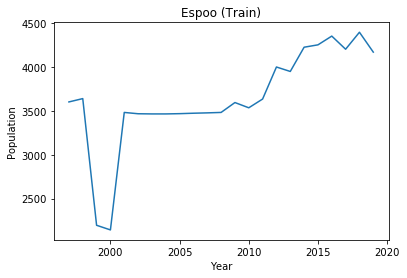

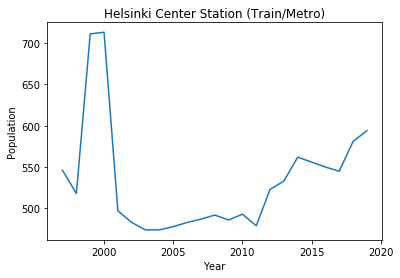

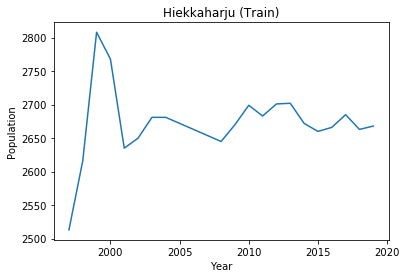

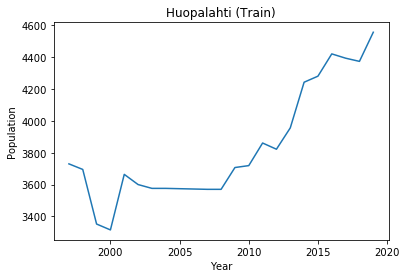

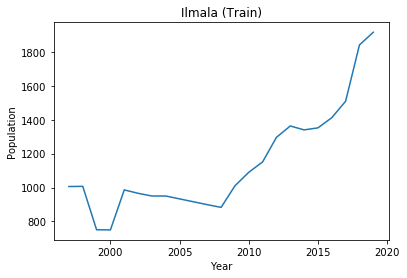

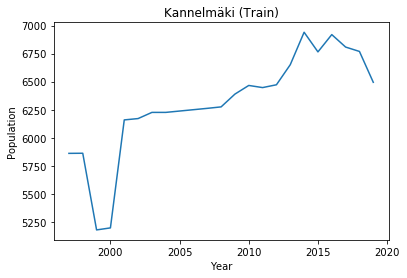

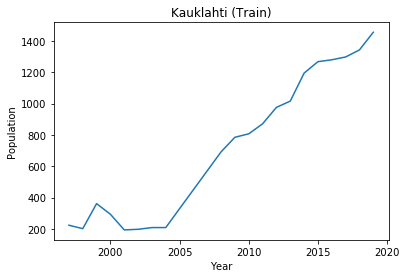

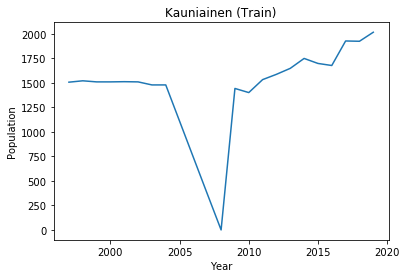

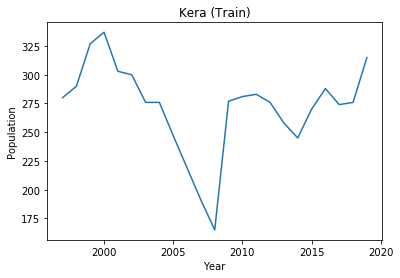

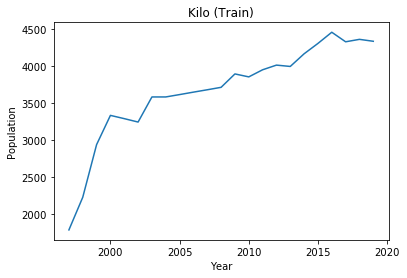

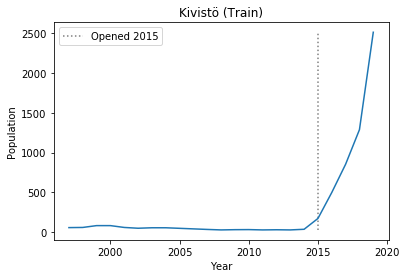

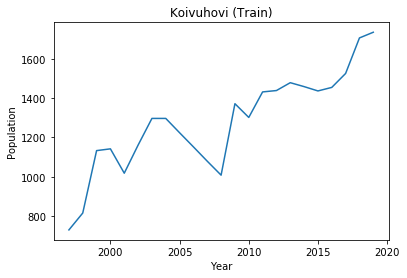

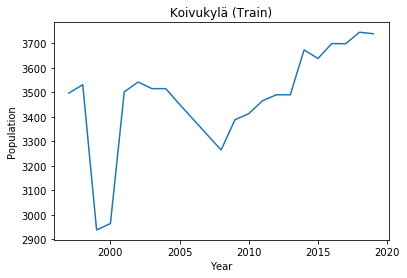

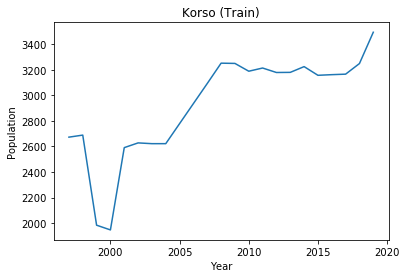

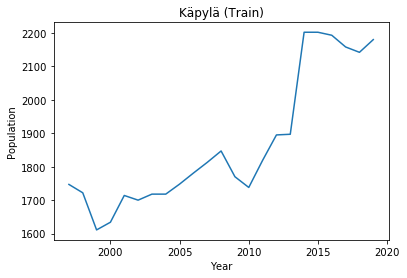

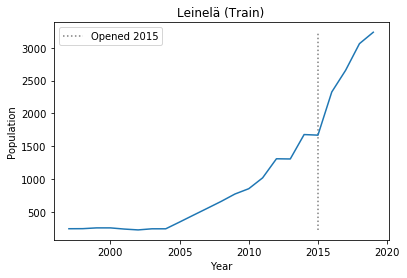

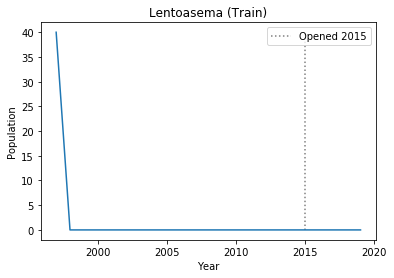

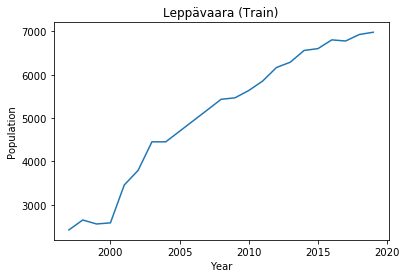

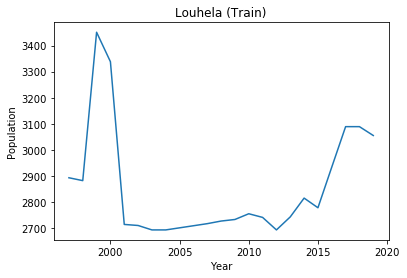

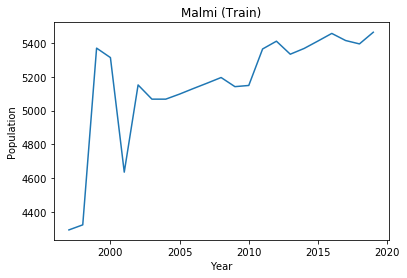

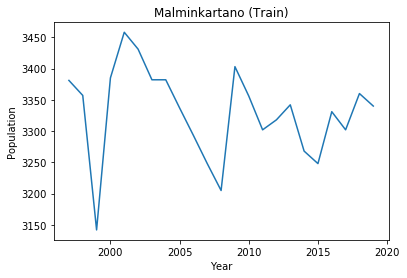

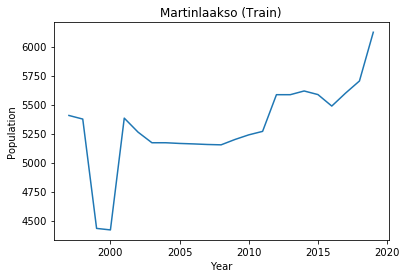

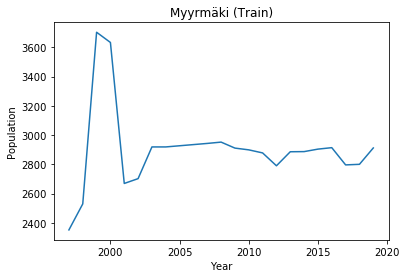

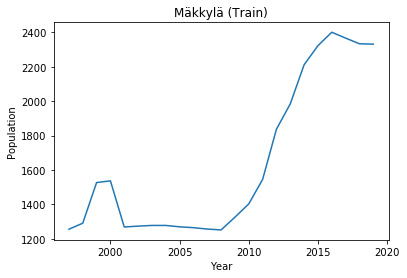

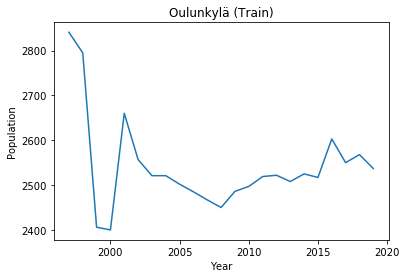

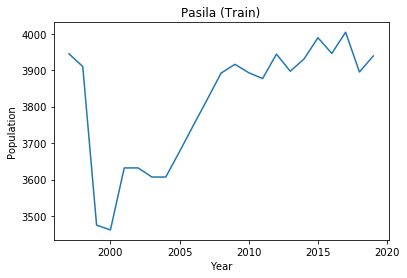

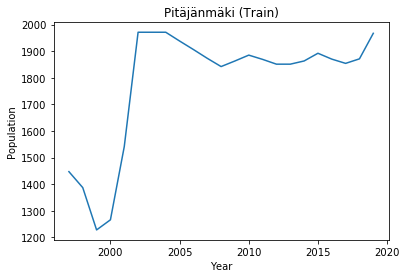

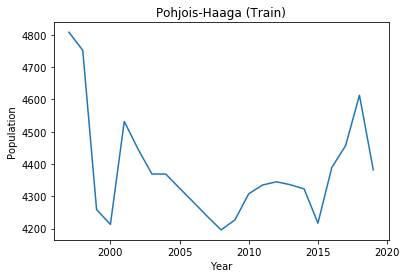

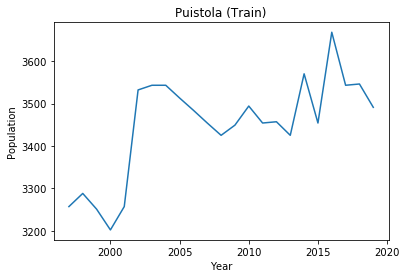

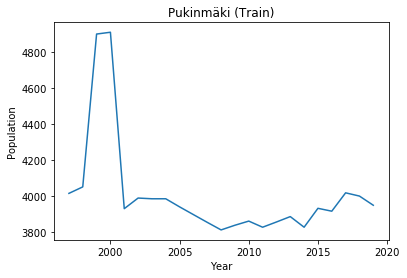

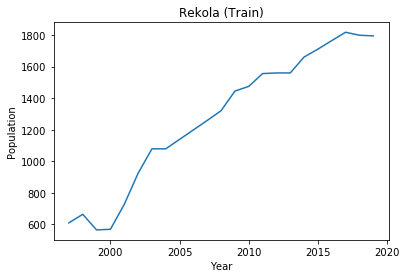

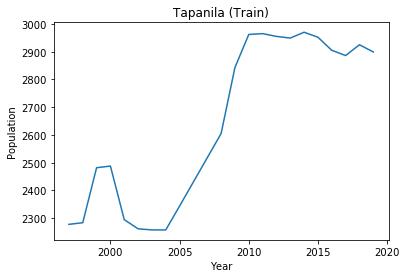

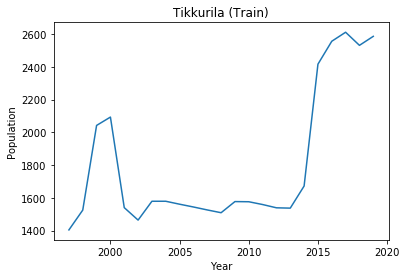

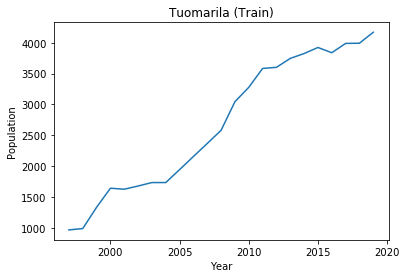

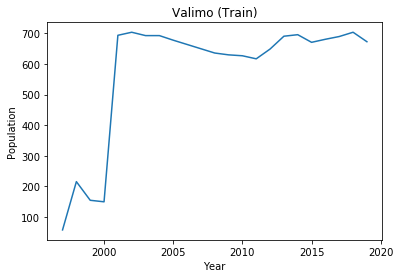

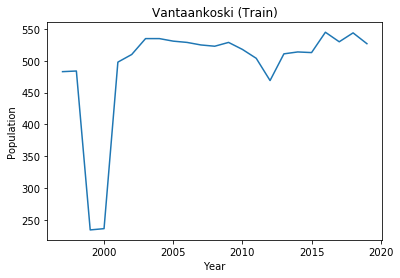

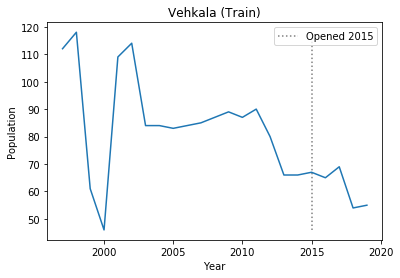

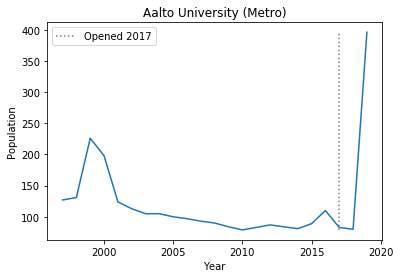

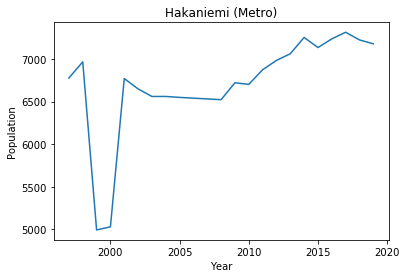

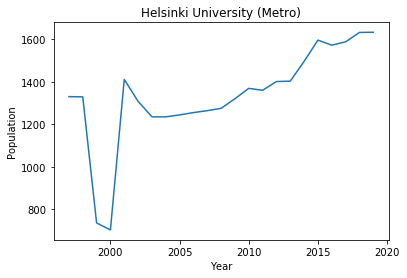

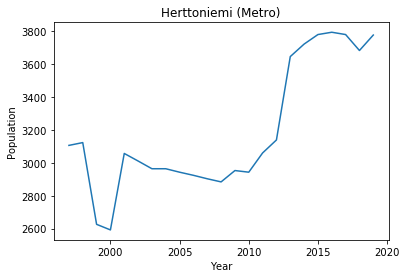

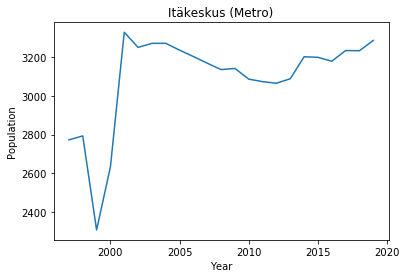

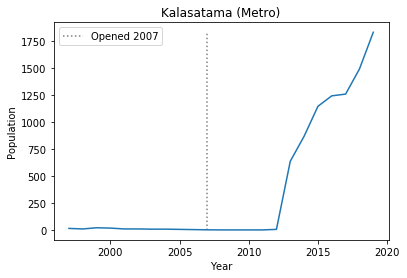

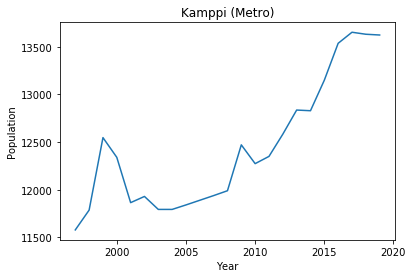

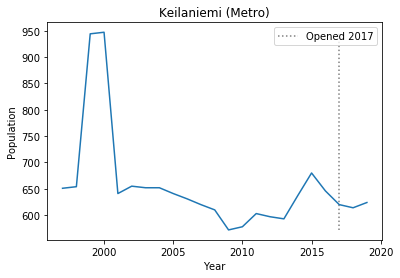

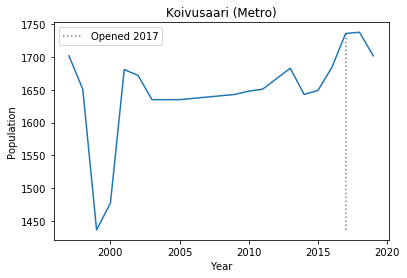

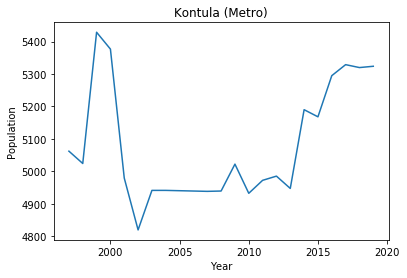

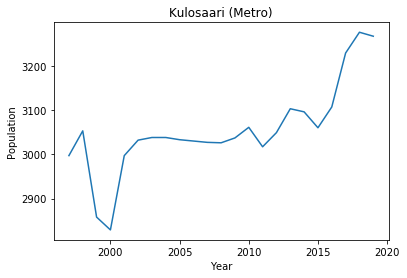

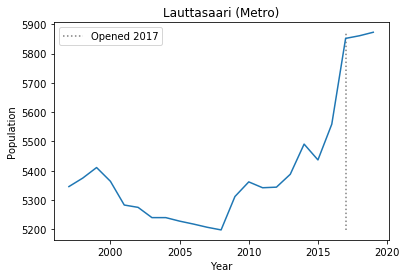

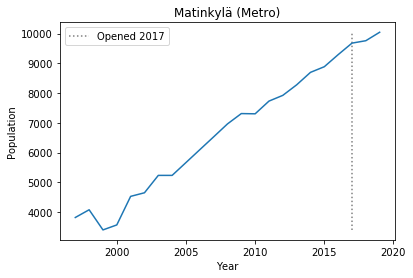

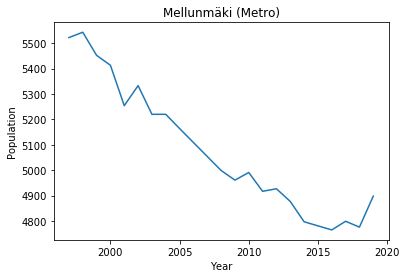

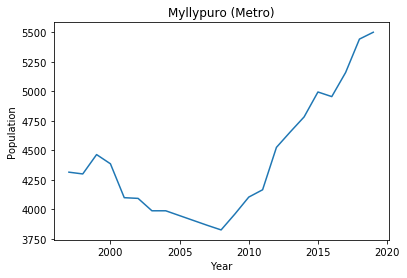

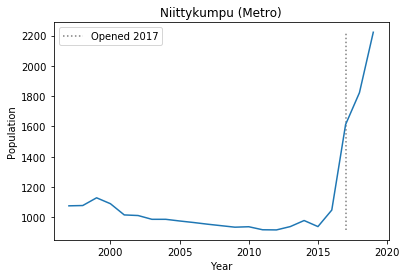

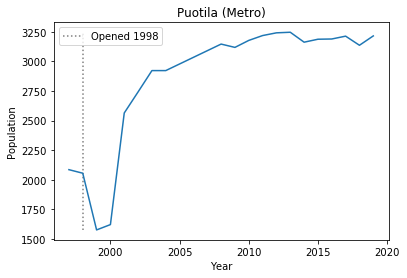

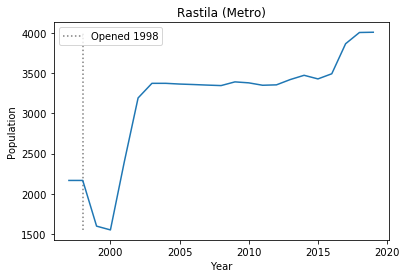

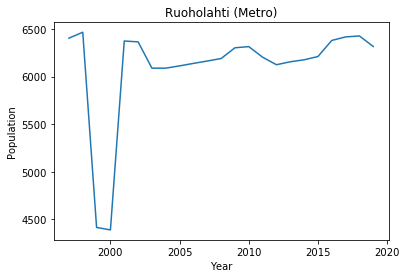

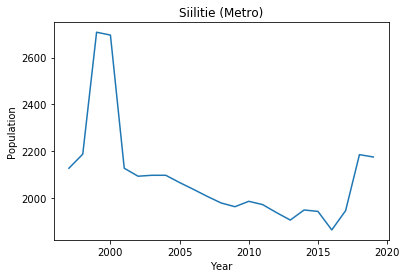

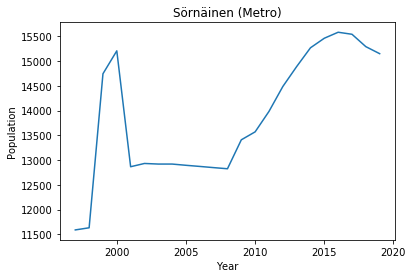

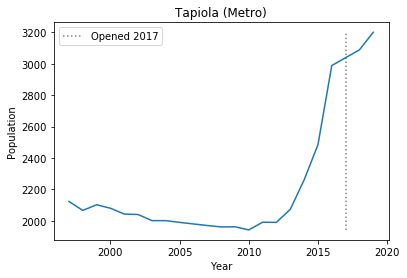

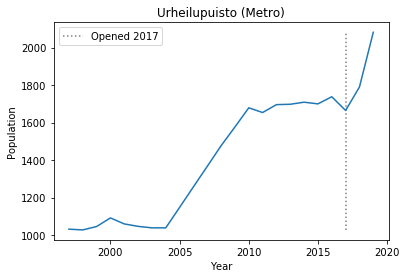

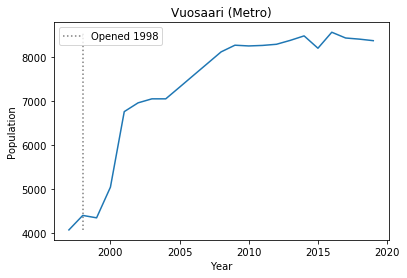

In [128]:
# Loop through stations and create figures
for station in stations:
    
    # Create dataframe station with data with selected station name
    data = stations_population[stations_population["Name"] == station]
    
    # Create list population. Will be used as y-values in figure
    # Create empty list and then loop throught population years and add values to list
    population = []
    for year in pop_years:
        population.append(int(data[year]))
    
    # Add bar to opening year, but only if opened later than 1997
    if data.iloc[0]['Opened'] > 1997:
        plt.vlines(x=data.iloc[0]['Opened'], ymin=min(population), ymax=max(population), colors="gray", 
                   linestyles="dotted", label="Opened "+str(data.iloc[0]['Opened']))
        plt.legend()
        
    # Create graph. X values are years and y values population on given year
    plt.plot(years_list, population) 
    
    # Name the x axis 
    plt.xlabel('Year') 
    
    # Name the y axis 
    plt.ylabel('Population') 
    
    # Title to graph. Use station name and type in title.
    plt.title(station + " (" + data.iloc[0]['Type'] + ")")
    
    # Save fig
    plt.savefig("pics_stations_graphs/"+name+".png", dpi=100)
    
    # Show the plot 
    plt.show() 